In [1]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.core import read, Stream, UTCDateTime

In [56]:
path = '/Users/sydneydybing/StrainProject/2024/'
gnss_path = path + 'gnss_data/my_modified_pub_data/'
strain_path = path + 'strain_data/'
seismic_path = path + 'seismic_data/'

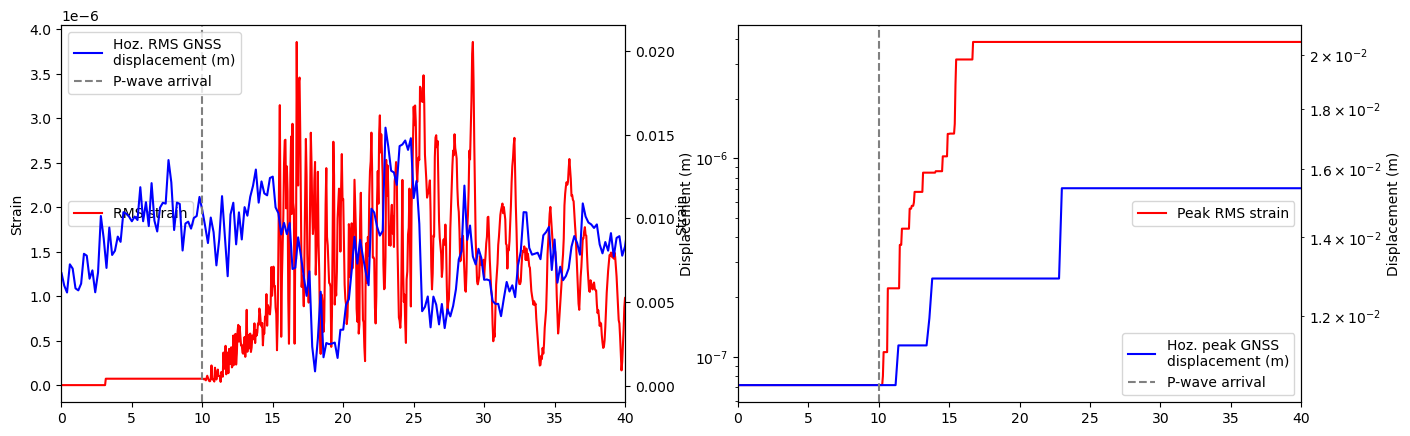

In [54]:
# M6.4

# GNSS data
p593_rms_gnss_rt = np.load(gnss_path + 'M6.4/P593/hoz_rms_pub_rt_data.npy')
p593_rms_gnss_1hz = np.load(gnss_path + 'M6.4/P593/hoz_rms_pub_proc_1hz_data.npy')
p593_rms_gnss_5hz = np.load(gnss_path + 'M6.4/P593/hoz_rms_pub_proc_5hz_data.npy')

p593_peak_gnss_rt = np.load(gnss_path + 'M6.4/P593/peak_pub_rt.npy')
p593_peak_gnss_1hz = np.load(gnss_path + 'M6.4/P593/peak_pub_proc_1hz.npy')
p593_peak_gnss_5hz = np.load(gnss_path + 'M6.4/P593/peak_pub_proc_5hz.npy')

p593_times_gnss_rt = np.load(gnss_path + 'M6.4/P593/pub_rt_times.npy')
p593_times_gnss_1hz = np.load(gnss_path + 'M6.4/P593/pub_proc_1hz_times.npy')
p593_times_gnss_5hz = np.load(gnss_path + 'M6.4/P593/pub_proc_5hz_times.npy')

# P arrival time

p_arrs_array = np.load(gnss_path + 'M6.4/pub_p_arrs.npy')
i = np.where(p_arrs_array[:,0] == 'P593')[0][0]
gnss_p_arr_time = float(p_arrs_array[i,1])

shift_by = gnss_p_arr_time - 10
p593_times_gnss_5hz = p593_times_gnss_5hz - shift_by

# Strain data
B917_rms_strain = read(strain_path + 'trimmed/2019-07-04_M6.4/B917.mseed')
B917_peak_strain = read(strain_path + 'peak_post_p/2019-07-04_M6.4/B917.mseed')

B917_rms_strain_times = B917_rms_strain[0].times()

# Plot
fig = plt.figure(figsize = (16,5), dpi = 100)

ax1 = fig.add_subplot(121)

ax1.plot(B917_rms_strain_times, B917_rms_strain[0].data, color = 'red', label = 'RMS strain')
ax1.set_xlim(0,40)
ax1.set_ylabel('Strain')
ax1.legend(loc = 'center left')

ax2 = ax1.twinx()
ax2.plot(p593_times_gnss_5hz, p593_rms_gnss_5hz, color = 'blue', label = 'Hoz. RMS GNSS\ndisplacement (m)')
ax2.axvline(10, color = 'gray', linestyle = '--', label = 'P-wave arrival')
ax2.legend(loc = 'upper left')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Displacement (m)')

ax3 = fig.add_subplot(122)

ax3.plot(B917_rms_strain_times, B917_peak_strain[0].data, color = 'red', label = 'Peak RMS strain')
ax3.set_xlim(0,40)
ax3.set_ylabel('Strain')
ax3.semilogy()
ax3.legend(loc = 'center right')

ax4 = ax3.twinx()
ax4.plot(p593_times_gnss_5hz, p593_peak_gnss_5hz, color = 'blue', label = 'Hoz. peak GNSS\ndisplacement (m)')
ax4.axvline(10, color = 'gray', linestyle = '--', label = 'P-wave arrival')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Displacement (m)')
ax4.semilogy()
ax4.legend(loc = 'lower right');



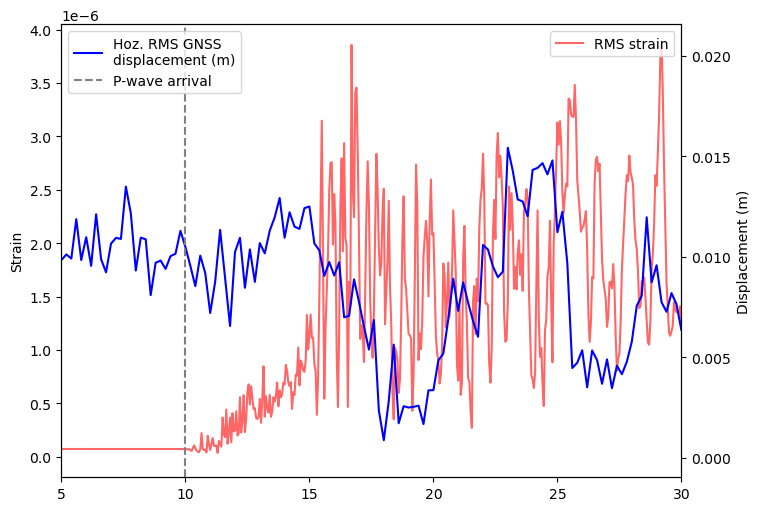

In [63]:
# Motivation figure

# M6.4

# GNSS data
p593_rms_gnss_rt = np.load(gnss_path + 'M6.4/P593/hoz_rms_pub_rt_data.npy')
p593_rms_gnss_1hz = np.load(gnss_path + 'M6.4/P593/hoz_rms_pub_proc_1hz_data.npy')
p593_rms_gnss_5hz = np.load(gnss_path + 'M6.4/P593/hoz_rms_pub_proc_5hz_data.npy')

p593_peak_gnss_rt = np.load(gnss_path + 'M6.4/P593/peak_pub_rt.npy')
p593_peak_gnss_1hz = np.load(gnss_path + 'M6.4/P593/peak_pub_proc_1hz.npy')
p593_peak_gnss_5hz = np.load(gnss_path + 'M6.4/P593/peak_pub_proc_5hz.npy')

p593_times_gnss_rt = np.load(gnss_path + 'M6.4/P593/pub_rt_times.npy')
p593_times_gnss_1hz = np.load(gnss_path + 'M6.4/P593/pub_proc_1hz_times.npy')
p593_times_gnss_5hz = np.load(gnss_path + 'M6.4/P593/pub_proc_5hz_times.npy')

# P arrival time

p_arrs_array = np.load(gnss_path + 'M6.4/pub_p_arrs.npy')
i = np.where(p_arrs_array[:,0] == 'P593')[0][0]
gnss_p_arr_time = float(p_arrs_array[i,1])

shift_by = gnss_p_arr_time - 10
p593_times_gnss_5hz = p593_times_gnss_5hz - shift_by

# Strain data
B917_rms_strain = read(strain_path + 'trimmed/2019-07-04_M6.4/B917.mseed')
B917_peak_strain = read(strain_path + 'peak_post_p/2019-07-04_M6.4/B917.mseed')

B917_rms_strain_times = B917_rms_strain[0].times()

fig = plt.figure(figsize = (8,6), dpi = 100)

ax1 = fig.add_subplot(111)

ax1.plot(B917_rms_strain_times, B917_rms_strain[0].data, color = 'red', label = 'RMS strain', alpha = 0.6)
ax1.set_xlim(5,30)
ax1.set_ylabel('Strain')
ax1.legend(loc = 'upper right')

ax2 = ax1.twinx()
ax2.plot(p593_times_gnss_5hz, p593_rms_gnss_5hz, color = 'blue', label = 'Hoz. RMS GNSS\ndisplacement (m)')
ax2.axvline(10, color = 'gray', linestyle = '--', label = 'P-wave arrival')
ax2.legend(loc = 'upper left')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Displacement (m)');

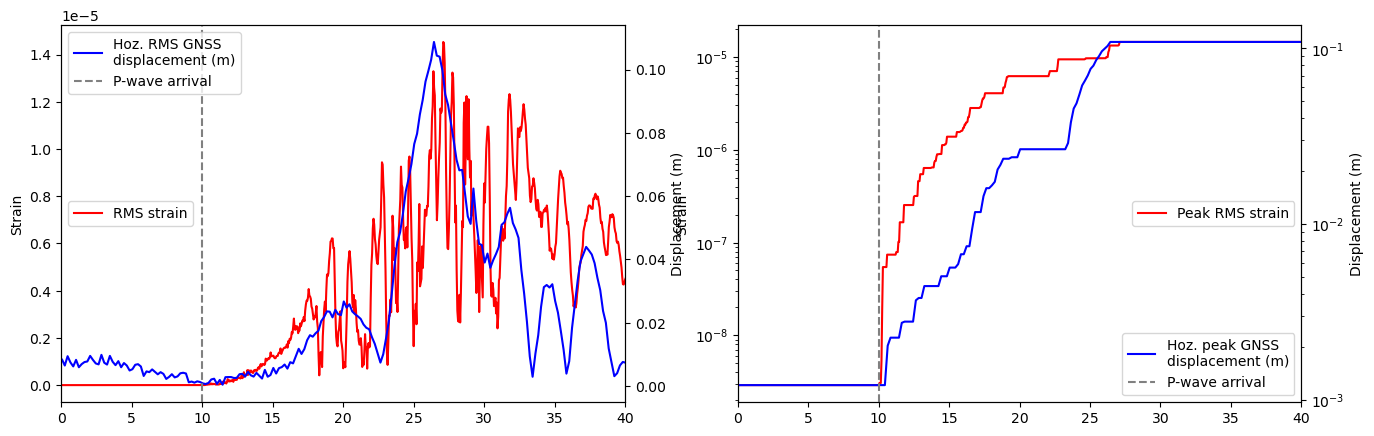

In [55]:
# M7.1

# GNSS data
p593_rms_gnss_rt = np.load(gnss_path + 'M7.1/P593/hoz_rms_pub_rt_data.npy')
p593_rms_gnss_1hz = np.load(gnss_path + 'M7.1/P593/hoz_rms_pub_proc_1hz_data.npy')
p593_rms_gnss_5hz = np.load(gnss_path + 'M7.1/P593/hoz_rms_pub_proc_5hz_data.npy')

p593_peak_gnss_rt = np.load(gnss_path + 'M7.1/P593/peak_pub_rt.npy')
p593_peak_gnss_1hz = np.load(gnss_path + 'M7.1/P593/peak_pub_proc_1hz.npy')
p593_peak_gnss_5hz = np.load(gnss_path + 'M7.1/P593/peak_pub_proc_5hz.npy')

p593_times_gnss_rt = np.load(gnss_path + 'M7.1/P593/pub_rt_times.npy')
p593_times_gnss_1hz = np.load(gnss_path + 'M7.1/P593/pub_proc_1hz_times.npy')
p593_times_gnss_5hz = np.load(gnss_path + 'M7.1/P593/pub_proc_5hz_times.npy')

# P arrival time

p_arrs_array = np.load(gnss_path + 'M7.1/pub_p_arrs.npy')
i = np.where(p_arrs_array[:,0] == 'P593')[0][0]
gnss_p_arr_time = float(p_arrs_array[i,1])

shift_by = gnss_p_arr_time - 10
p593_times_gnss_5hz = p593_times_gnss_5hz - shift_by

# Strain data
B917_rms_strain = read(strain_path + 'trimmed/2019-07-06_M7.1/B917.mseed')
B917_peak_strain = read(strain_path + 'peak_post_p/2019-07-06_M7.1/B917.mseed')

B917_rms_strain_times = B917_rms_strain[0].times()

# Seismic data
# Need to download horizontal components

# Plot
fig = plt.figure(figsize = (16,5), dpi = 100)

ax1 = fig.add_subplot(121)

ax1.plot(B917_rms_strain_times, B917_rms_strain[0].data, color = 'red', label = 'RMS strain')
ax1.set_xlim(0,40)
ax1.set_ylabel('Strain')
ax1.legend(loc = 'center left')

ax2 = ax1.twinx()
ax2.plot(p593_times_gnss_5hz, p593_rms_gnss_5hz, color = 'blue', label = 'Hoz. RMS GNSS\ndisplacement (m)')
ax2.axvline(10, color = 'gray', linestyle = '--', label = 'P-wave arrival')
ax2.legend(loc = 'upper left')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Displacement (m)')

ax3 = fig.add_subplot(122)

ax3.plot(B917_rms_strain_times, B917_peak_strain[0].data, color = 'red', label = 'Peak RMS strain')
ax3.set_xlim(0,40)
ax3.set_ylabel('Strain')
ax3.semilogy()
ax3.legend(loc = 'center right')

ax4 = ax3.twinx()
ax4.plot(p593_times_gnss_5hz, p593_peak_gnss_5hz, color = 'blue', label = 'Hoz. peak GNSS\ndisplacement (m)')
ax4.axvline(10, color = 'gray', linestyle = '--', label = 'P-wave arrival')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Displacement (m)')
ax4.semilogy()
ax4.legend(loc = 'lower right');